<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Jair Bolsonaro (PL) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Jair Bolsonaro do Partido Liberal, do qual pode ser visualizado clicando <a href="https://static.poder360.com.br/2022/08/plano-de-governo-bolsonaro-definitivo.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = 'PlanosPDF/PLANOPL.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Trapped': 'False',
 'GTS_PDFXVersion': 'PDF/X-1:2001',
 'Title': 'Diretrizes de Plano de Governo_2.indd',
 'CreationDate': "D:20220809170218-03'00'",
 'ModDate': "D:20220809220943Z00'00'",
 'Creator': 'Adobe InDesign 17.3 (Macintosh)',
 'GTS_PDFXConformance': 'PDF/X-1a:2001',
 'Producer': 'macOS Versão 12.5 (Compilação 21G72) Quartz PDFContext, AppendMode 1.1'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

48

In [7]:
# Página 1
pdf.pages[0].extract_text()

'PELO BEM\nDO BRASIL\nPLANO DE\nPLANO DE GOVERNO2023 - 2026 1'

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

APRESENTAÇÃO
Este documento tem por objetivo 
expor orientações gerais para o 
Plano de Governo de reeleição 
de Jair Bolsonaro. É o produto de 
discussões, conversas, leituras, 
debates e opiniões de variadas fontes 
experientes no trato da coisa pública 
e com visão futura que propicie ao 
Brasil se tornar, cada vez mais, uma 
potência econômica que beneﬁ cie 
sua população. Trata-se, portanto, de 
um documento estratégico, com uma 
visão moderna diante do contexto 
histórico que vivenciamos,
e de alto nível.
Em síntese, a metodologia utilizada 
foi: ouvir interessados e especialistas, 
aprofundar conhecimentos por 
meio de leitura adequada, de 
forma que seu conteúdo possa ser 
tempestivamente aprimorado.
Como premissas, foram empregadas 
a linguagem direta, a enunciação 
de exemplos que demonstram o 
que se pretende fazer, modiﬁ car ou 
dar continuidade, e a estruturação 
PLANO DE GOVERNO2023 - 2026 5


## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

PELO 


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

pelo bem
do brasil
plano de
plano de governo2023 - 2026 1introdução............................................................................................................................................................................................................................................   3
apresentação......................................................................................................................................................................................................................................  5
1. valores e princípios centrais do plano de governo_____________________________  8
1.1 a liberdade e a vida ..................................................................................................................................................................................................................  8
  a) liberdade econômica  9
  b) liberdade religiosa  9
  c) liberdade de expressão  9
  d) liberdade para a defesa de dir

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

pelo bem
do brasil
plano de
plano de governo2023   2026 1introdução    3
apresentação   5
1  valores e princípios centrais do plano de governo_____________________________  8
1 1 a liberdade e a vida    8
  a  liberdade econômica  9
  b  liberdade religiosa  9
  c  liberdade de expressão  9
  d  liberdade para a defesa de direitos  9
  e  liberdade para o uso responsável dos recursos naturais  10
1 2 dignidade para os menos favorecidos   10
1 3 solidariedade social e voluntariado    11
1 4 equilíbrio socioeconômico regional    11
2  fundamentação estratégica ___________________________________________________  12
3  plano de governo ______________________________________________________________  14
3 1 economia  tecnologia e inovação    14
  a  avançar e consolidar as políticas de geração de emprego e renda  16
  b  promover o crescimento sustentado do pib no médio e longo prazo  17
  c  promover e fortalecer a capacidade de agregação de valor da agropecuária e da mineração  19
  d  fo

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['pelo', 'bem', 'do', 'brasil', 'plano']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['bem', 'brasil', 'plano', 'plano', 'governo2023']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('governo', 257),
 ('brasil', 129),
 ('plano', 121),
 ('nacional', 104),
 ('segurança', 98),
 ('desenvolvimento', 97),
 ('saúde', 85),
 ('meio', 85),
 ('ações', 83),
 ('país', 76),
 ('social', 75),
 ('2026', 73),
 ('outros', 73),
 ('políticas', 69),
 ('federal', 69),
 ('pessoas', 66),
 ('gestão', 65),
 ('br', 65),
 ('programa', 65),
 ('2022', 64),
 ('além', 64),
 ('bolsonaro', 60),
 ('população', 60),
 ('vida', 59),
 ('deve', 59),
 ('cidadão', 58),
 ('fonte', 57),
 ('https', 56),
 ('liberdade', 55),
 ('serviços', 55)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,governo,257
1,brasil,129
2,plano,121
3,nacional,104
4,segurança,98


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

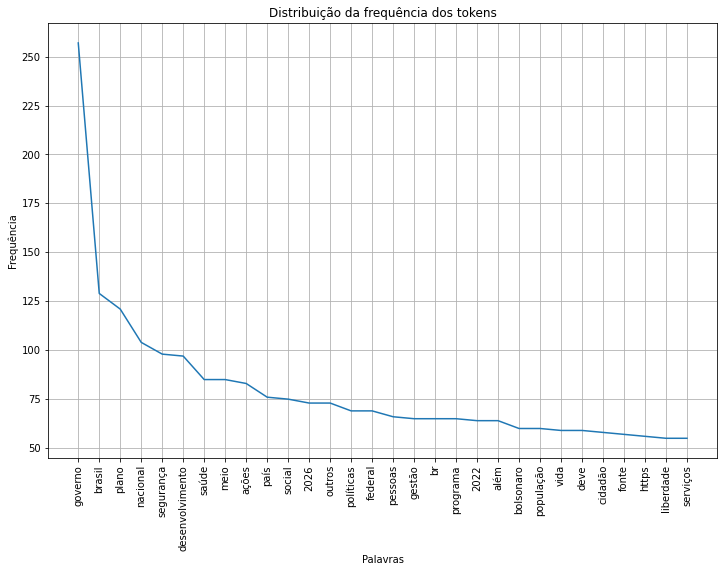

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

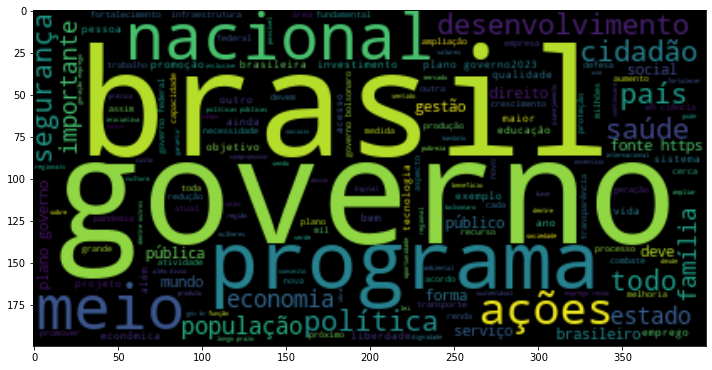

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022